In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_feature_description(col_name:str):
    df = pd.read_csv('lending_club_info.csv')
    pd.set_option('display.max_colwidth', 300)

    print(df.loc[df['LoanStatNew'] == col_name, ['Description']])

In [2]:
lending_df = pd.read_csv("lending_club_loan_two.csv")
lending_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [3]:
lending_df.shape

(396030, 27)

In [4]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
lending_df['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

## plotting loan purpose counts

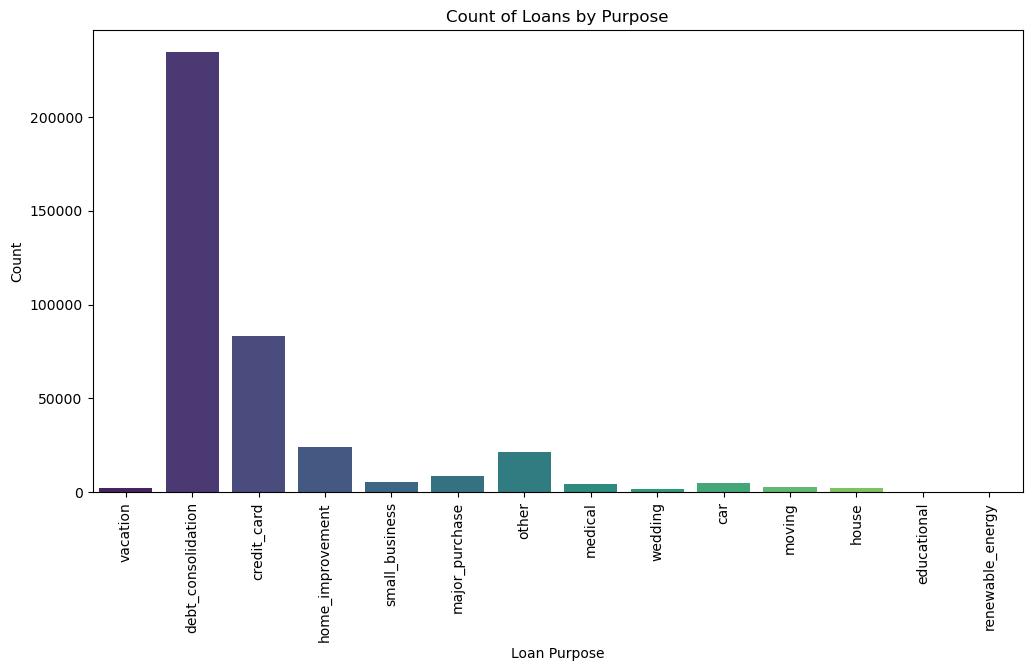

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', data=lending_df, palette='viridis')
plt.title('Count of Loans by Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# the majority of loans fall into the debt-consolidation category 

In [9]:
lending_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

## comparing interest rates and credit grades

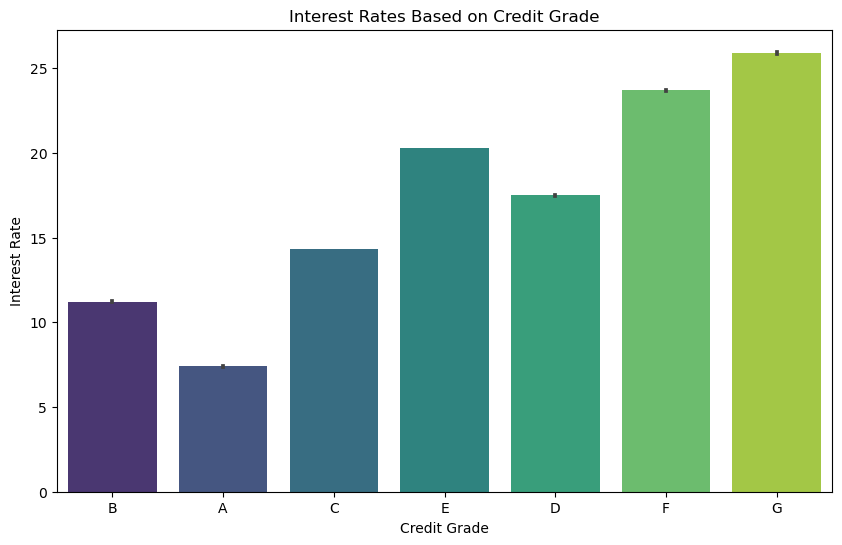

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=lending_df, x='grade', y='int_rate', palette='viridis')
plt.title('Interest Rates Based on Credit Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Interest Rate')
plt.show()

# as expected, the lower a borrowers credit grade is, the higher their insterst rate will be

## plotting most common installments

C:\Users\Abbi\AppData\Local\Temp\ipykernel_11136\2336991940.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(lending_df['installment'], bins=30, kde=True, palette= 'viridis')
c:\Users\Abbi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


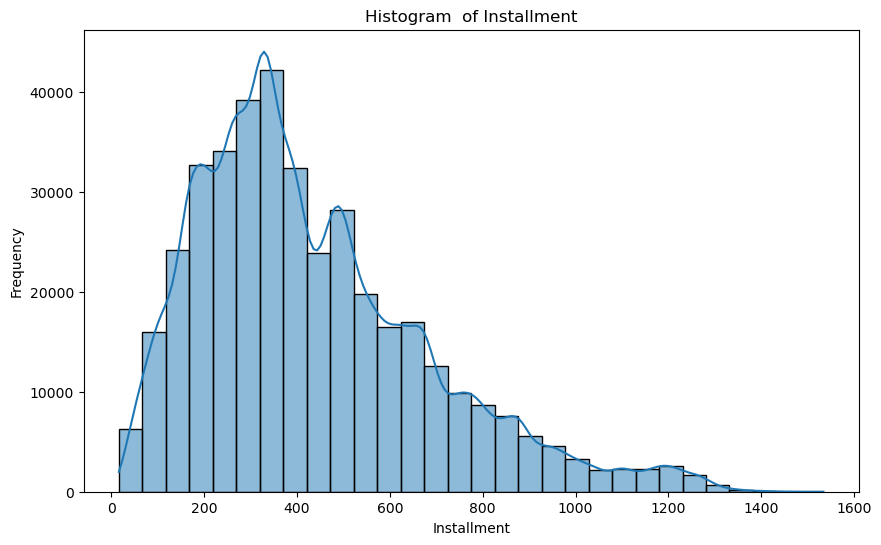

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(lending_df['installment'], bins=30, kde=True, palette= 'viridis')
plt.title('Histogram  of Installment')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

# you can see most of the installments fall in  the 200-400 range

In [11]:
sorted(lending_df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [33]:
emp_len_inc = lending_df.groupby('emp_length')['annual_inc'].mean()
print(emp_len_inc)


emp_length
1 year       69700.714303
10+ years    81262.885450
2 years      71768.216806
3 years      72862.784181
4 years      72788.310415
5 years      73185.418388
6 years      73610.048841
7 years      74013.635764
8 years      75466.537177
9 years      75514.539483
< 1 year     69194.399887
Name: annual_inc, dtype: float64


c:\Users\Abbi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


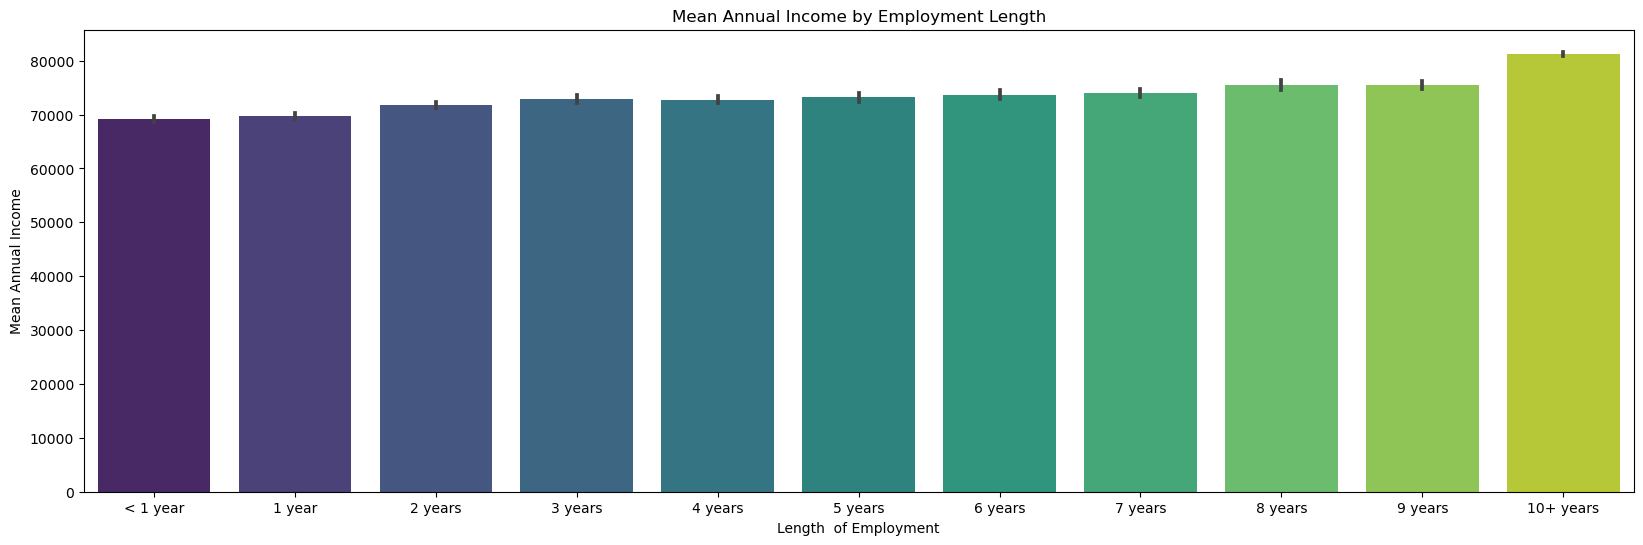

In [44]:
# sort the df by length of employment
# define the order of employment lengths
# convert to categorical variable with the specifed order

emp_len_sort = lending_df.sort_values(by='emp_length')
employment_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
emp_len_sort['emp_length'] = pd.Categorical(emp_len_sort['emp_length'], categories=employment_order, ordered=True)

# plot the mean annual income based on employment length

plt.figure(figsize=(20,6))
sns.barplot(x='emp_length', y='annual_inc', data=emp_len_sort, palette= 'viridis')
plt.xlabel("Length  of Employment")
plt.ylabel("Mean Annual Income")
plt.title("Mean Annual Income by Employment Length")
plt.show()

# avg income is pretty similar amongst employment lengths 